In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

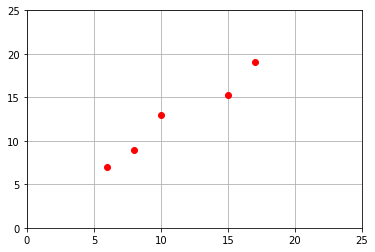

In [30]:
X = np.array([6,8,10,15,17])
y = np.array([7,9,13,15.3,19.1])

plt.figure()
plt.plot(X,y,'ro')
plt.axis([0,25,0,25])
plt.grid()
plt.show()

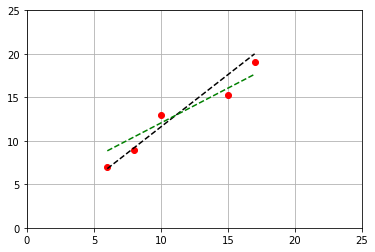

In [31]:
def linear_func1(data):
    return data*1.2-0.4
def linear_func2(data):
    return data*0.8+4.05
plt.figure()
plt.plot(X,y,'ro')
plt.plot(X,linear_func1(X),'k--')
plt.plot(X,linear_func2(X),'g--')

plt.axis([0,25,0,25])
plt.grid()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
X = X.reshape(-1,1)  #학습데이터는 2차원 
model.fit(X,y)

LinearRegression()

In [33]:
print(model.score(X,y))

0.9518244215508245


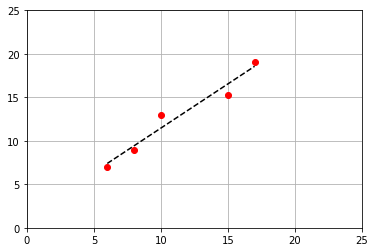

In [42]:
plt.plot(X,y,'ro')
plt.plot(X,model.predict(X),'k--')
plt.axis([0,25,0,25])
plt.grid()

In [43]:
# y = ax + b
# a , b
print(model.coef_,model.intercept_)

[1.01520737] 1.3096774193548342


In [45]:
predict_1 = model.predict(X)
print(predict_1)
predict_2 = X * model.coef_ + model.intercept_
print(predict_2)

[ 7.40092166  9.43133641 11.46175115 16.53778802 18.56820276]
[[ 7.40092166]
 [ 9.43133641]
 [11.46175115]
 [16.53778802]
 [18.56820276]]


In [17]:
# ---- example
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data)
y = pd.Series(boston.target)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
                    X.values,y.values,random_state=1)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4).fit(X_train,y_train)
lr_model = LinearRegression().fit(X_train,y_train)

In [12]:
print('knn:',knn_model.score(X_train,y_train))
print('lr:',lr_model.score(X_train,y_train))

knn: 0.7164251418080176
lr: 0.7168057552393374


In [13]:
print('knn_test:',knn_model.score(X_test,y_test))
print('lr_test:',lr_model.score(X_test,y_test))

knn_test: 0.5847379837420476
lr_test: 0.7789410172622863


In [14]:
# 오차의 제곱합을 최소로하는 회귀선
# y = ax +b 에서
# a 는 x와 y의 공분산을 x의 분산으로 나눈 것,
# 아래 코드는 수학적 계산을 통해 linearregression의 답과 같은지 확인!!  

X = np.array([6,8,10,15,17]).reshape(-1,1)
y = np.array([7,9,13,15.3,19.1]).reshape(-1,1)


In [15]:
sigma_Xy = np.sum(X*y)
sigma_X = np.sum(X)
sigma_y = np.sum(y)
n = len(X)

square_X_sigma = np.sum(X**2)
sigma_X_square = np.sum(X)**2

In [16]:
a = ((sigma_Xy)-((sigma_X*sigma_y)/n)) / ((square_X_sigma)-(sigma_X_square/n))
a

1.01520737327189

In [17]:
b = np.mean(y) - a*np.mean(X)
b

1.3096774193548324

In [21]:
model2 = LinearRegression().fit(X,y)
# print(model2.coef_,model.intercept_)

In [15]:
# Ridge 는 선형모델에 L2제약조건을 추가
# L2제약주건 : 모든 특성에 대한 가중치의 값을 0 주변으로 위치하도록 제어하는 제약조건

from sklearn.linear_model import Ridge ,Lasso

In [23]:
# alpha의 값을 크게 걸면 제약 크게 거는 것 -> 모든 특성들의 가중치 값이 0에서 멀어짐
# ===> 결국 LinearRegressor 와 동일해짐
# alpha 값을 작게 걸면 제약을 작게 거는 것 -> 모든 특성들의 가중치 값이 0주변으로 위치
ridge_model = Ridge(alpha=0.5).fit(X.values,y.values)
lg_model = LinearRegression().fit(X,y)
print("Ridge:",ridge_model.score(X.values,y.values))
print("Linear:",lg_model.score(X.values,y.values))



Ridge: 0.739957023371629
Linear: 0.7406426641094095


In [33]:
print("Linear_test:",lg_model.score(X_test,y_test))
print("Ridge_test:",ridge_model.score(X_test,y_test))

Linear_test: 0.8088901199655486
Ridge_test: 0.8106095292736756


In [22]:
# ---- Lasso
lasso_model = Lasso(alpha=10).fit(X.values,y.values)
print("Lasso:",lasso_model.score(X.values,y.values))

Lasso: 0.5233631451699069


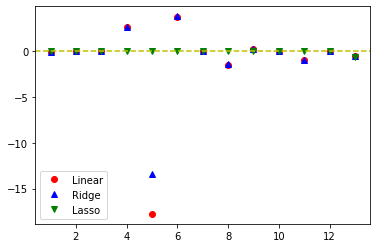

In [29]:
coef_range=np.arange(1,lg_model.coef_.shape[0]+1)
plt.plot(coef_range,lg_model.coef_,'ro',label="Linear")
plt.plot(coef_range,ridge_model.coef_,'b^',label="Ridge")
plt.plot(coef_range,lasso_model.coef_,'gv',label="Lasso")
plt.axhline(0,color='y',linestyle='--')
plt.legend()